In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('weatherAUS.csv')
pd.set_option("display.max_columns", None)

In [3]:
#handling missing values
df = data.copy()
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [4]:
def rsimputation(df,variable):
  df[variable] = df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable]=random_sample

In [5]:
rsimputation(df, "Cloud9am")
rsimputation(df, "Cloud3pm")
rsimputation(df, "Evaporation")
rsimputation(df, "Sunshine")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


/var/folders/0k/f_6vc2sj16qbrnybdggkphgw0000gn/T/ipykernel_15074/1161793952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationmat = df.corr(method = "spearman")


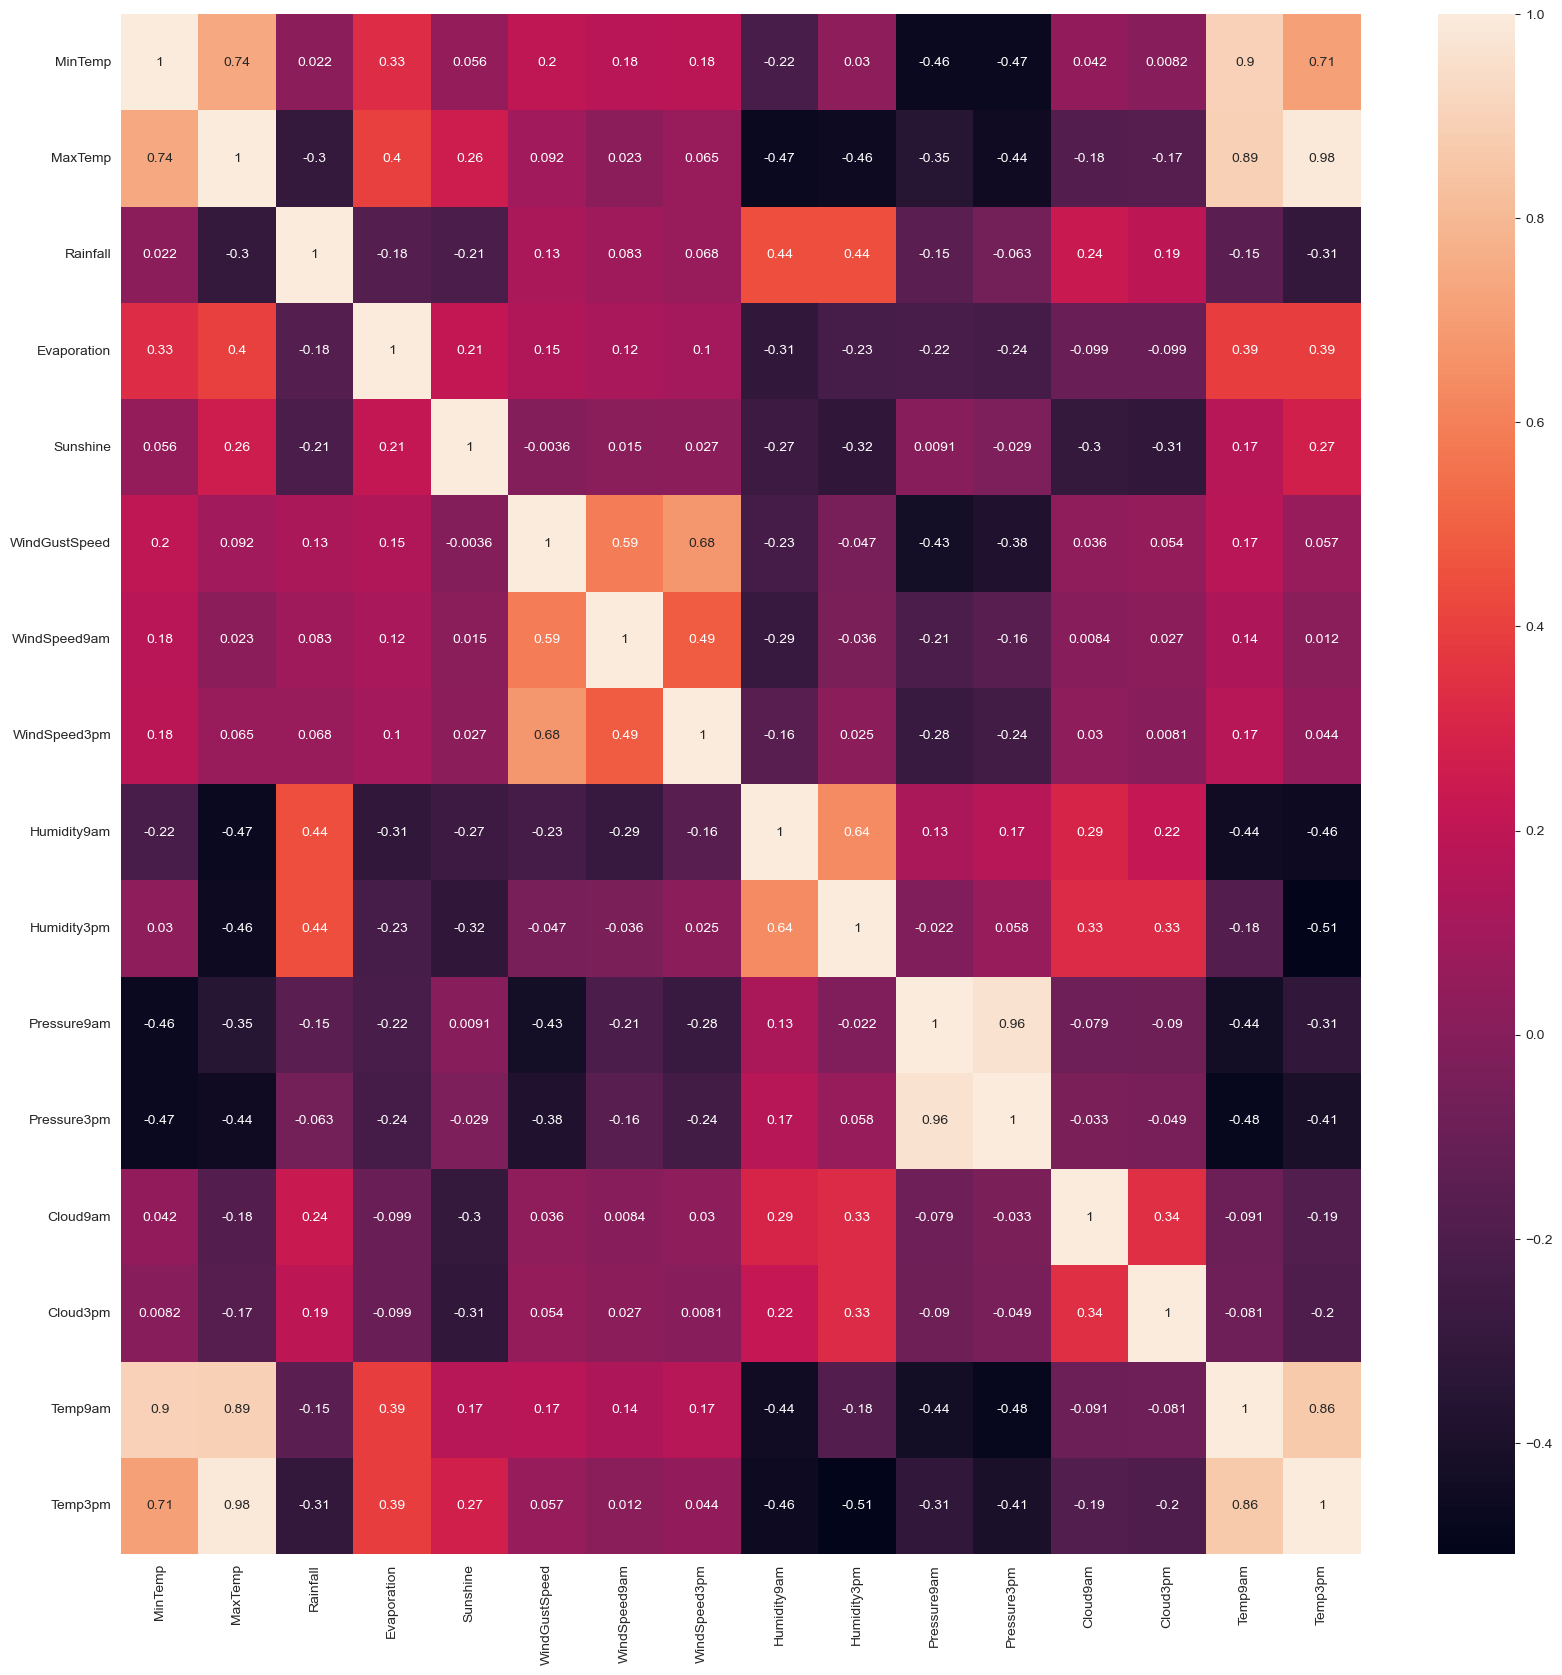

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
correlationmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#heat map for rain in australia

g = sns.heatmap(correlationmat, annot=True) 

In [7]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.dropna()
#data = data.replace(np.nan, 0)
data = data.sort_values(by='Date')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [8]:
data.columns.values.tolist()
print(data.shape)

(56420, 23)


In [9]:
df = pd.get_dummies(data,columns=['Location','WindGustDir','WindDir9am',
 'WindDir3pm','RainToday'])


In [10]:
df.columns.values.tolist()

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'Location_AliceSprings',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Darwin',
 'Location_Hobart',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Sale',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_WaggaWagga',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Woomera',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_N

In [11]:
X=df[['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_AliceSprings',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Darwin',
 'Location_Hobart',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Sale',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_WaggaWagga',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Woomera',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'WindDir3pm_NW',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW',
 'WindDir3pm_SW',
 'WindDir3pm_W',
 'WindDir3pm_WNW',
 'WindDir3pm_WSW',
 'RainToday_No',
 'RainToday_Yes']]
Y=df['RainTomorrow']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Print size of train and test sets to check
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(45136, 92) (45136,)
(11284, 92) (11284,)


In [13]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)



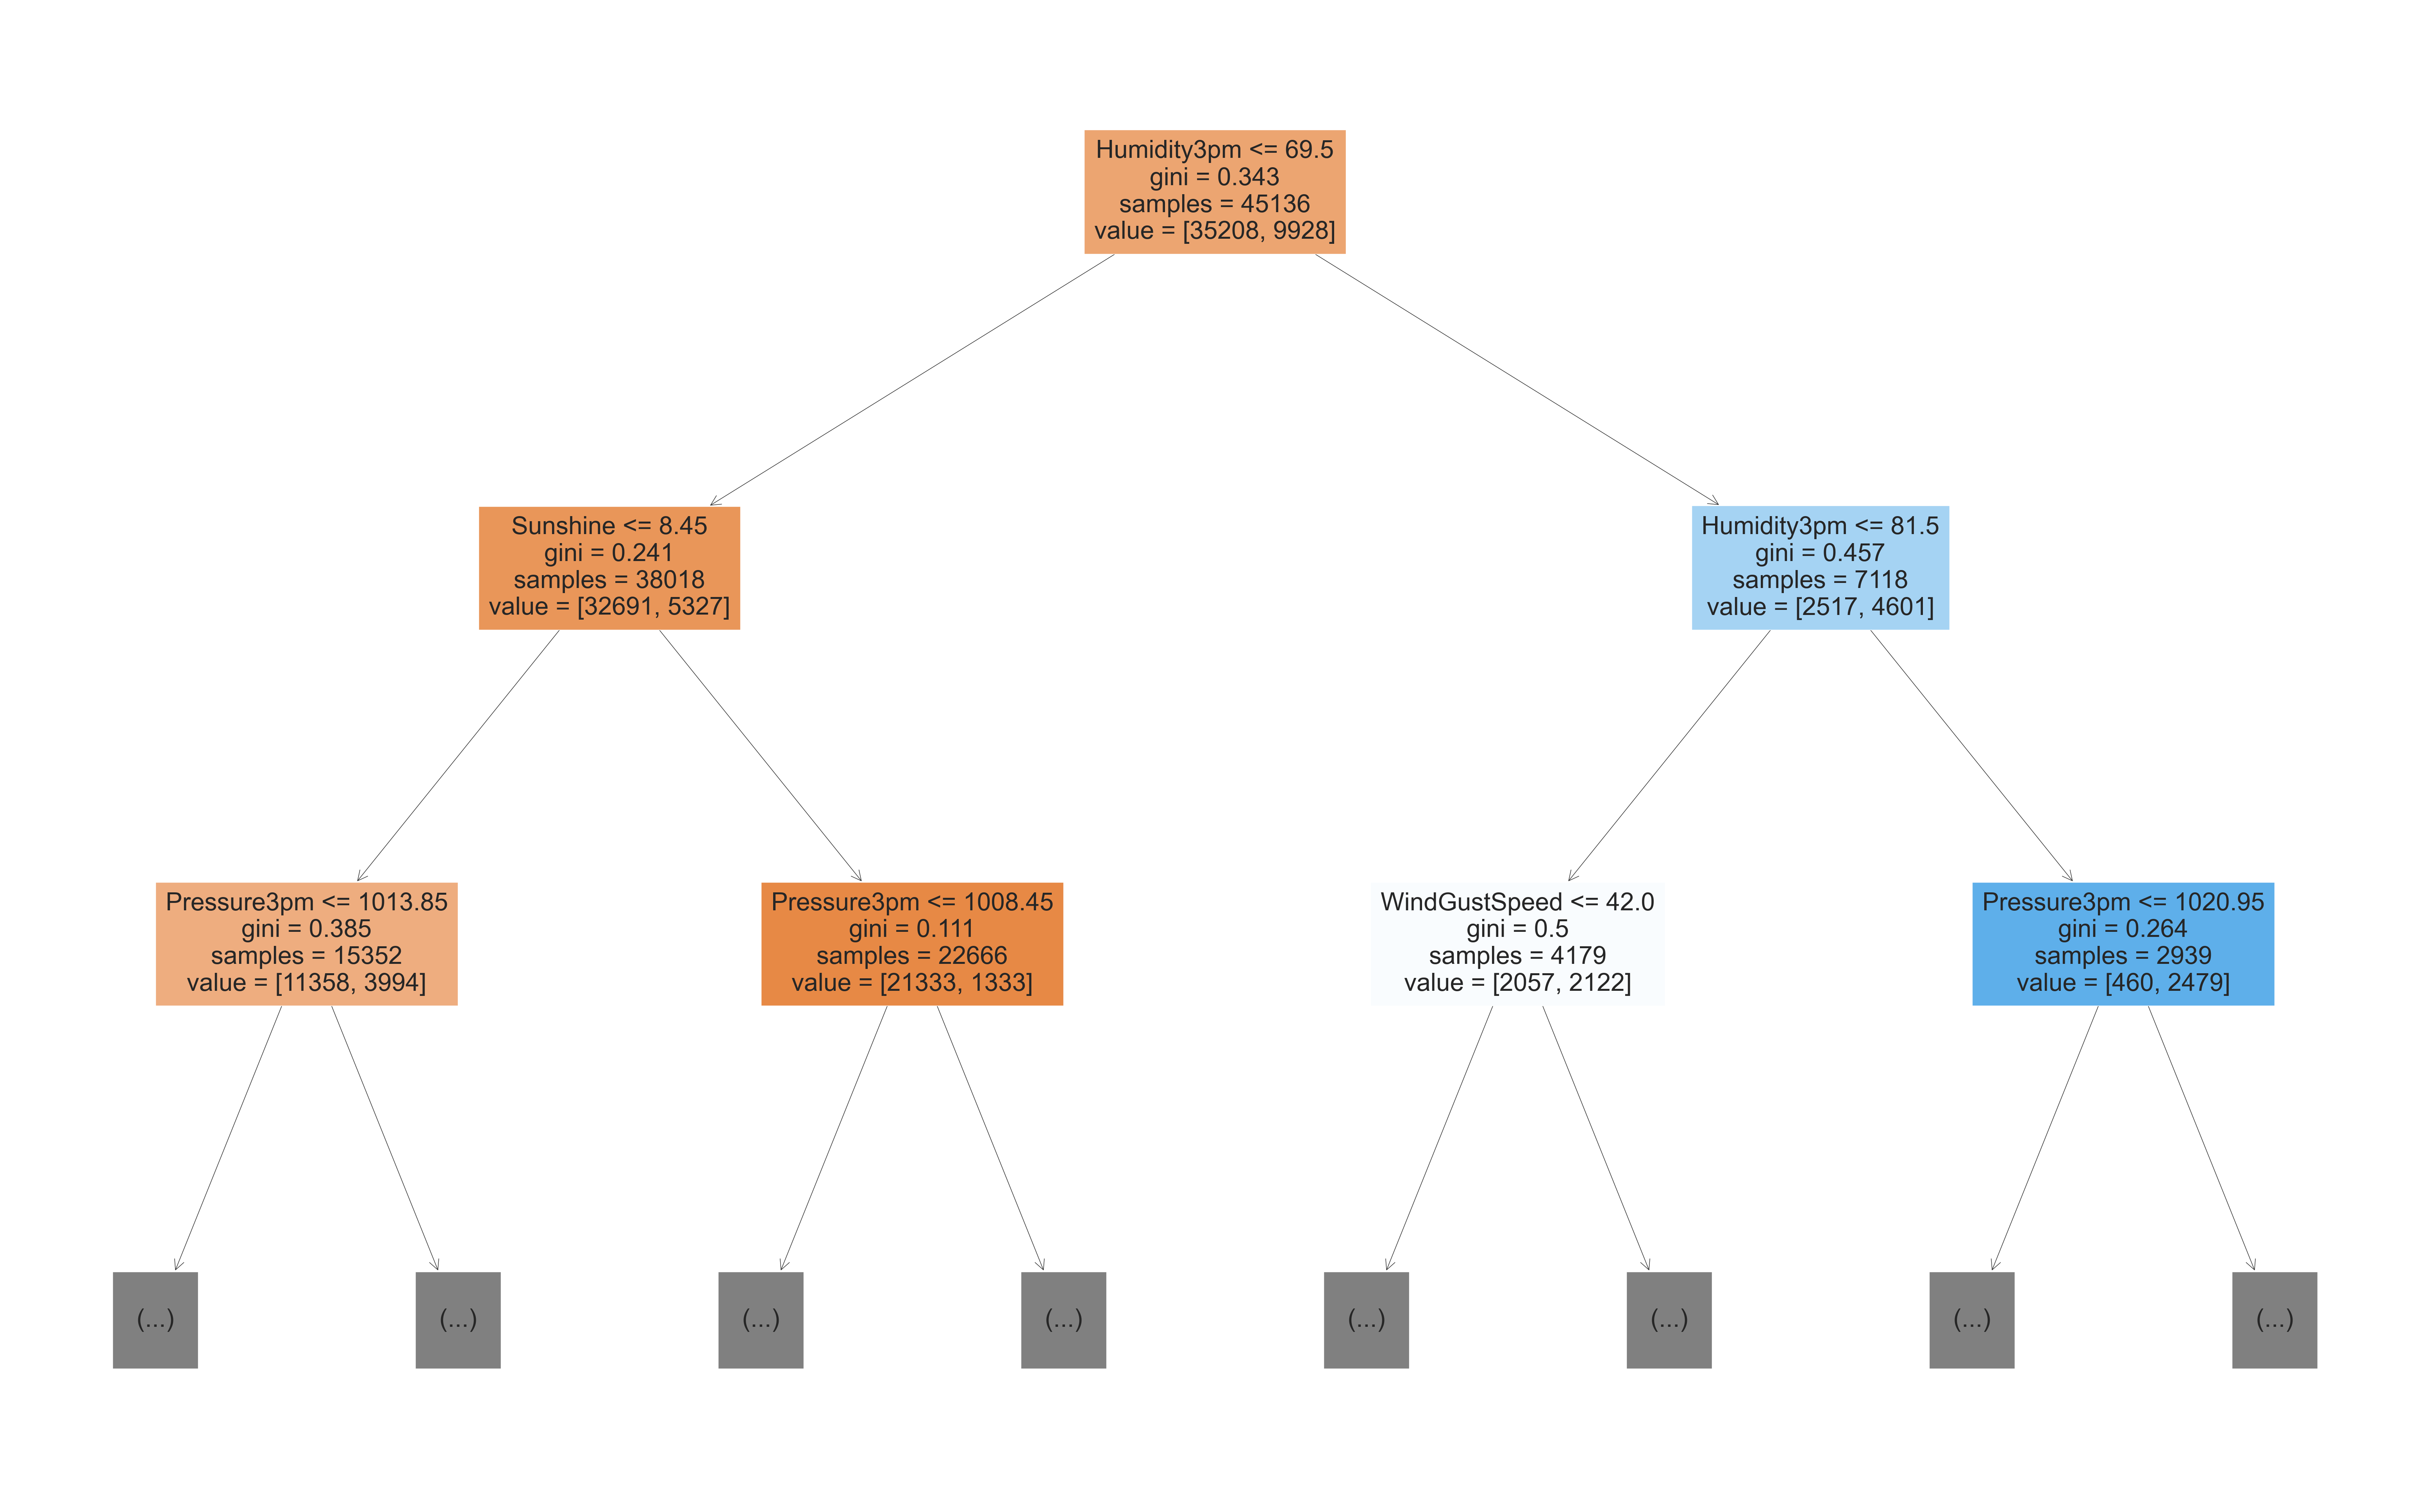

In [14]:
#visualization 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

plt.figure(figsize=(80,50))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);


In [15]:
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
9,Humidity3pm,0.269737
4,Sunshine,0.098618
11,Pressure3pm,0.074640
5,WindGustSpeed,0.051098
10,Pressure9am,0.037098
...,...,...
22,Location_Darwin,0.000932
41,Location_Woomera,0.000816
19,Location_Canberra,0.000660
20,Location_Cobar,0.000547


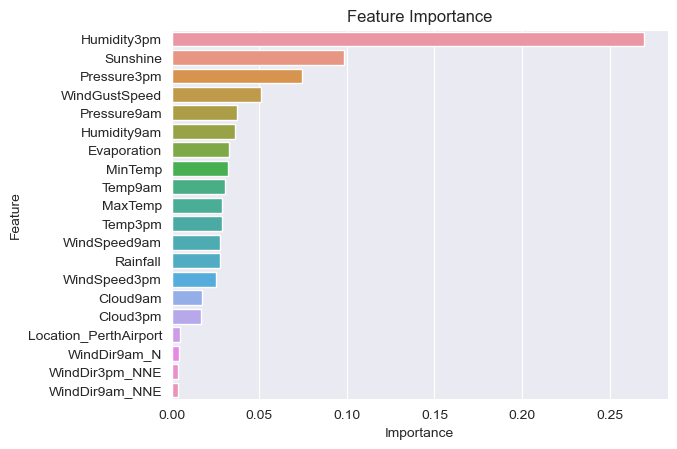

In [16]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(20), x='Importance', y='Feature');

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.7997164126196384


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=100)
model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.8526231832683445


/Users/michaelcordero/anaconda3/envs/cap-5602-final-project-group-5/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear',C=1, random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [20]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.857940446650124


In [22]:
from sklearn import metrics

metrics.plot_roc_curve(model, X_test, Y_test)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [23]:
from sklearn import svm

C = 2.0
model = svm.SVC(kernel='rbf', gamma='auto', C=C)

model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.8419000354484225


In [23]:
from sklearn import svm

C = 1.0
model = svm.SVC(kernel='linear', C=C)
# model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
# model = svm.SVC(kernel='poly', degree=4, gamma='auto', C=C)

model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)


Accuracy on test set: 0.8569656150301311


<Axes: >

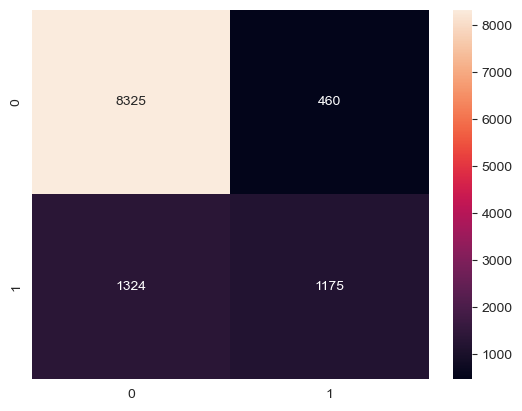

In [24]:
#SVM visualization
from sklearn.metrics import confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(Y_test, Y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d")

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

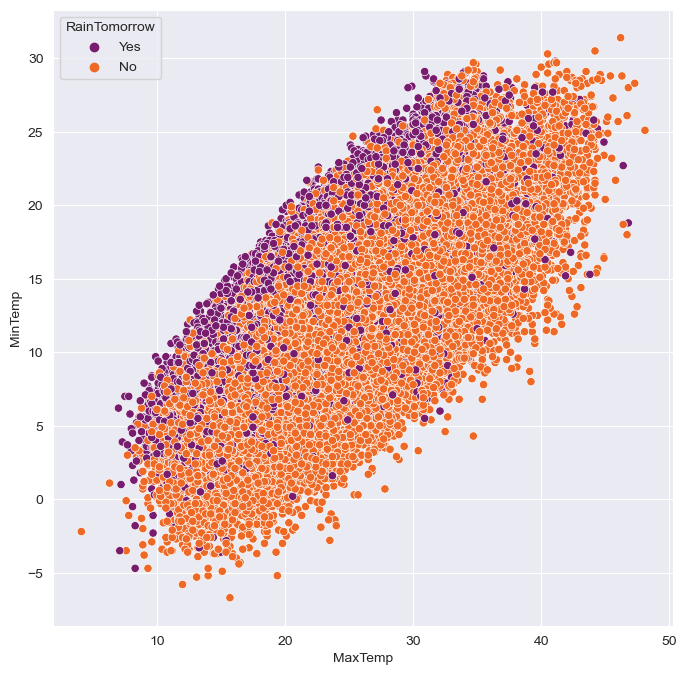

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='inferno',data=df)

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

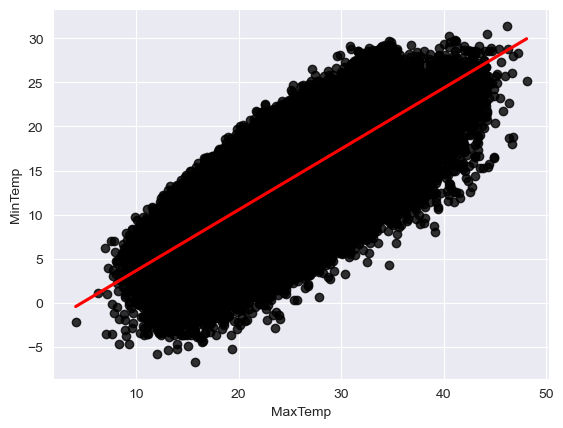

In [26]:
sns.regplot(x = "MaxTemp",
            y = "MinTemp", 
            ci = None,
            data = df,scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [27]:
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

/Users/michaelcordero/anaconda3/envs/cap-5602-final-project-group-5/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by SVC.

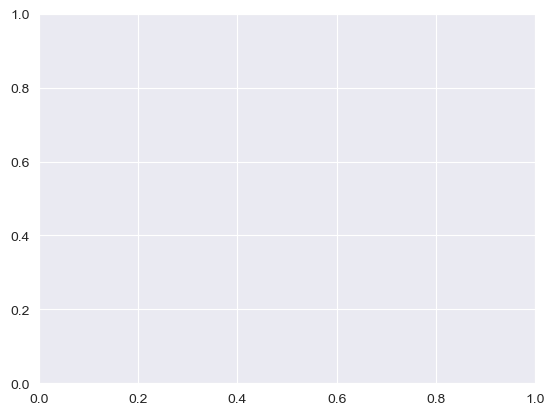

In [28]:
plt.subplot(1, 1, 1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)